In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import evaluate as ev
import explore as ex
import modeling as m
import viz_kmeans as v

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_length * iris.sepal_width

In [6]:
X = iris[['sepal_area','petal_area']]

In [7]:
iris, X_scaled, scaler, kmeans, centroids = m.create_cluster(iris, X, 3)

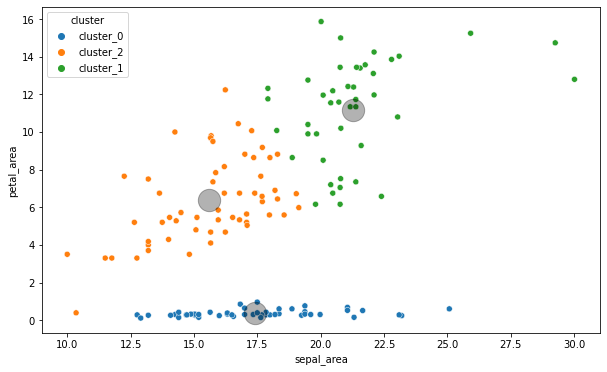

In [8]:
m.create_scatter_plot('sepal_area','petal_area',iris, kmeans, X_scaled, scaler)

In [9]:
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
1,5.1,3.5,1.4,0.2,setosa,0.28,17.85,0
2,4.9,3.0,1.4,0.2,setosa,0.28,14.70,0
3,4.7,3.2,1.3,0.2,setosa,0.26,15.04,0
4,4.6,3.1,1.5,0.2,setosa,0.30,14.26,0
5,5.0,3.6,1.4,0.2,setosa,0.28,18.00,0


In [10]:
print(kmeans)

KMeans(n_clusters=3, random_state=539)


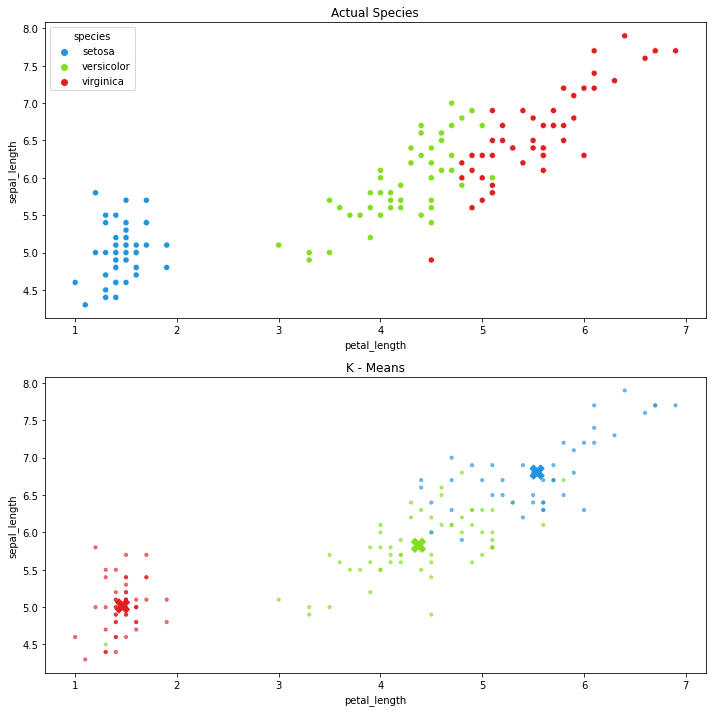

In [11]:
v.viz_iris(iris, kmeans)